## Analysis Nifty for best day,month and stocks to trade


An analysis of the SP500 in the period 2000-2021 which aims to answer the following questions:

What was the best day to invest taking into account the return of the gap movement?

What was the best day to invest taking into account the return of intraday movements?

What were the best industries that belong to the SP500 in which to invest?

What were the moments of high volatility that affected the SP500?

What were the 9 best companies to invest in?


https://github.com/facundoallia/analisisSP500/blob/main/SP500%20analisis.ipynb

In [1]:
#We import the libraries that we are going to use for the analysis:
import pandas as pd
import numpy as np
import yfinance as yf
import bs4 as bs
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

### What was the best day to invest taking into account the return of the gap movement?

In [3]:
#We download the historical quotes of the S&P500 through yfinance:
sp500 = yf.download("^NSEI", start="2000-01-01", end="2021-12-31")


#We set "Date" as an index:
sp500["Date"] = sp500.index

# We create the "Day" column with the day of the week to which each record corresponds:
sp500["Day"] = sp500["Date"].dt.dayofweek


# We create the column "retornos_gaps" with the variations between the following closing and opening:
sp500["retornos_gaps"] = np.log(sp500["Open"]/sp500["Close"].shift(1)).fillna(0)


# We establish a new dataframe with the averages of the "returns_gaps" column grouped by day:
ret_sp = pd.DataFrame(sp500.groupby('Day')['retornos_gaps'].mean())


# We make modifications to the dataframe for better visualization:
ret_sp['retornos_gaps'] = round(ret_sp['retornos_gaps']*100,2)
ret_sp = ret_sp.transpose()
ret_sp

[*********************100%%**********************]  1 of 1 completed


Day,0,1,2,3,4
retornos_gaps,0.07,0.13,0.12,0.09,0.1


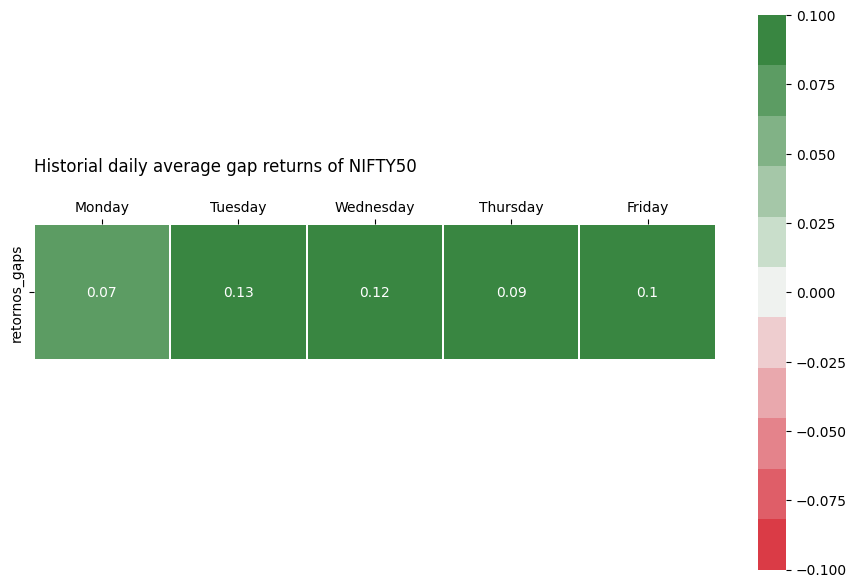

In [7]:
# figura:
fig, ax = plt.subplots(figsize=(11, 9))

# plot heatmap:
sb.heatmap(ret_sp, cmap=sb.diverging_palette(10, 130, n=11), vmin= -0.1, vmax=0.1, square=True,
           linewidth=0.3, annot=True , cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


plt.xticks(np.arange(5) + .5, labels=xticks_labels)

# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'Historial daily average gap returns of NIFTY50 \n'
plt.title(title, loc='left')
plt.show()

According to the analysis carried out, although the differences are not significant, the best day to invest only taking into account the gap returns is Tuesday, with an average return in the period under study of 0.13%. On the other hand, the worst day to carry out this strategy is Monday, with an average return in the period under study of 0.07%.

Although the "buy the close, sell the open" strategy seems to work in theory, several factors must be taken into account that drastically reduce its results:

### What was the best day to invest taking into account the return of intraday movements?

In [11]:
# We define the "intra_returns" column for intraday returns
sp500["intra_returns"] = np.log(sp500["Close"]/sp500["Open"]).fillna(0)

# We add the average of the intraday returns grouped by day to the "ret_sp" dataframe
ret_sp = ret_sp.transpose()
ret_sp['intra_returns'] = pd.DataFrame(sp500.groupby('Day')['intra_returns'].mean())
ret_sp['intra_returns'] = round(ret_sp['intra_returns']*100,2)
ret_sp = ret_sp.transpose()
ret_sp

Day,0,1,2,3,4
retornos_gaps,0.07,0.13,0.12,0.09,0.10
retornos_intra,-0.10,-0.07,-0.01,-0.11,-0.04
intra_returns,-0.10,-0.07,-0.01,-0.11,-0.04


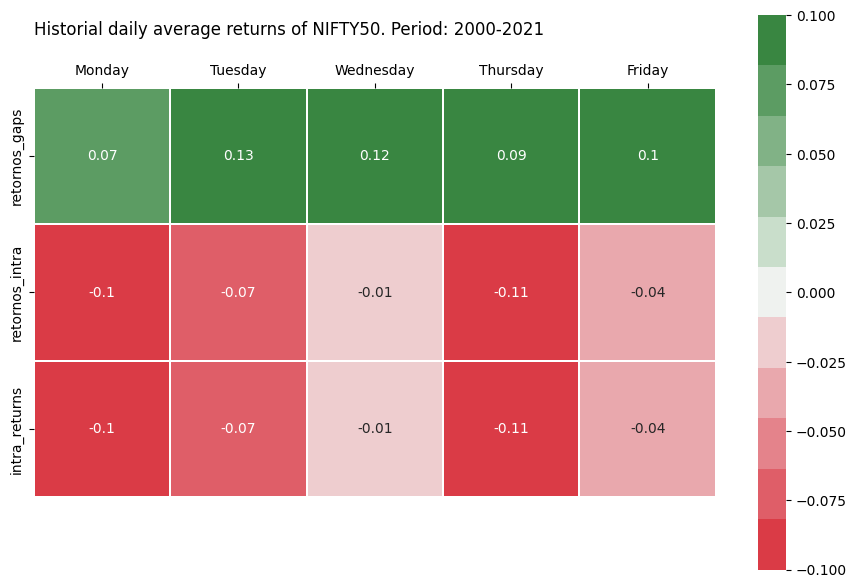

In [13]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(ret_sp, cmap=sb.diverging_palette(10, 130, n=11), vmin= -0.1, vmax=0.1, square=True,
           linewidth=0.3, annot=True , cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
yticks_labels = ['Average overnight returns', 'Average intraday returns']

plt.xticks(np.arange(5) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'Historial daily average returns of NIFTY50. Period: 2000-2021 \n'
plt.title(title, loc='left')
plt.show()

The same considerations that were presented for the "buy the close, sell the open" strategy must be taken into account for the second strategy.

## What were the 9 best companies to invest in?

To determine the best companies to invest in in the period under study, we will analyze the historical returns of the stocks that make up the NIFTY50 index:

In [ ]:
#Obtenemos la lista de tickers de las empresas que componenen el SP&500 mediante scraping:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
tickers = [s.replace('\n', '') for s in tickers]
tickers = [s.replace('.', '-') for s in tickers]

#Seteamos los valores de fecha y descargamos las cotizaciones de todos los tickers por medio de la libreria yfinance:
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2021,12,31)
data = yf.download(tickers, start=start, end=end)

In [23]:
import datetime
import yfinance as yf

# Read tickers from the file
with open('nifty50_symbols.txt', 'r') as file:
    tickers = [line.strip() for line in file]

# Replace '.' with '-' in tickers
#tickers = [s.replace('.', '-') for s in tickers]

# Set the start and end dates for data retrieval
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2021, 12, 31)

# Download data using yfinance
data = yf.download(tickers, start=start, end=end)

# Now you can use the data as needed
# For example, printing the first few rows of the downloaded data
print(data.head())?


[*********************100%%**********************]  48 of 48 completed

1 Failed download:
['HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-01 00:00:00 -> 2021-12-31 00:00:00)')


               Adj Close                                          \
           ADANIPORTS.NS ASIANPAINT.NS AXISBANK.NS BAJAJ-AUTO.NS   
Date                                                               
2000-01-03           NaN           NaN    3.695570           NaN   
2000-01-04           NaN           NaN    3.838256           NaN   
2000-01-05           NaN           NaN    3.738377           NaN   
2000-01-06           NaN           NaN    3.645630           NaN   
2000-01-07           NaN           NaN    3.467273           NaN   

                                                                               \
           BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS BRITANNIA.NS    CIPLA.NS   
Date                                                                            
2000-01-03           NaN           NaN           NaN    54.291897   99.520424   
2000-01-04           NaN           NaN           NaN    54.123337  100.059898   
2000-01-05           NaN           NaN           N

In [31]:
# Reseteamos el índice para obtener las fechas en columna y eliminamos los registros que no corresponden:
data = data.reset_index()
data = data.drop(data.index[[5545,5546]])

print(data.head(5))

  level_0 index       Date     Adj Close                            \
                           ADANIPORTS.NS ASIANPAINT.NS AXISBANK.NS   
0       0     0 2000-01-03           NaN           NaN    3.695570   
1       1     1 2000-01-04           NaN           NaN    3.838256   
2       2     2 2000-01-05           NaN           NaN    3.738377   
3       3     3 2000-01-06           NaN           NaN    3.645630   
4       4     4 2000-01-07           NaN           NaN    3.467273   

                                                           ...       Volume  \
  BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS  ... SUNPHARMA.NS   
0           NaN           NaN           NaN           NaN  ...     390399.0   
1           NaN           NaN           NaN           NaN  ...     747102.0   
2           NaN           NaN           NaN           NaN  ...     788156.0   
3           NaN           NaN           NaN           NaN  ...     448235.0   
4           NaN           NaN      

In [33]:
# Check the current indices
print(data.index)

# Reset index and drop the rows
data = data.reset_index(drop=True)
data = data.drop([5534])

# Print the first 5 rows after dropping
print(data.head(5))


RangeIndex(start=0, stop=5500, step=1)


KeyError: '[5534] not found in axis'

In [35]:
# Reset index and drop the rows
data = data.reset_index(drop=True)
data = data[data.index != 5534]

# Print the first 5 rows after dropping
print(data.head(5))


  level_0 index       Date     Adj Close                            \
                           ADANIPORTS.NS ASIANPAINT.NS AXISBANK.NS   
0       0     0 2000-01-03           NaN           NaN    3.695570   
1       1     1 2000-01-04           NaN           NaN    3.838256   
2       2     2 2000-01-05           NaN           NaN    3.738377   
3       3     3 2000-01-06           NaN           NaN    3.645630   
4       4     4 2000-01-07           NaN           NaN    3.467273   

                                                           ...       Volume  \
  BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS  ... SUNPHARMA.NS   
0           NaN           NaN           NaN           NaN  ...     390399.0   
1           NaN           NaN           NaN           NaN  ...     747102.0   
2           NaN           NaN           NaN           NaN  ...     788156.0   
3           NaN           NaN           NaN           NaN  ...     448235.0   
4           NaN           NaN      

In [37]:
# Creamos un dataframe que contiene el porcentaje de cambio diario de cada acción:
multpl_stock_daily_returns = data['Adj Close'].pct_change()
multpl_stock_daily_returns.set_index(data["Date"])

# Definimos un dataframe que contiene el porcentaje de cambio diario de cada acción acumulado:
sp500_cum_ret = (multpl_stock_daily_returns + 1).cumprod()

# Obtenemos otro dataframe con el retorno acumulado al final del periódo bajo estudio:
cum_final_ret = sp500_cum_ret.loc[[5530]]
cum_final_ret = cum_final_ret.transpose()
cum_final_ret = cum_final_ret.reset_index()
cum_final_ret.columns = ["Tickers","Cumulative final return"]

# Ordenamos los datos por la columna"Cumulative final return" obteniendo un ranking con las 9 empresas con mayores retornos:
cum_final_ret = cum_final_ret.sort_values("Cumulative final return", ascending=False)
cum_final_ret.head(9)

/tmp/ipykernel_8418/2249805543.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  multpl_stock_daily_returns = data['Adj Close'].pct_change()


KeyError: "None of [Index([5530], dtype='int64')] are in the [index]"